In [1]:
# tabular data manipulation
import numpy as np
import pandas as pd
# datetime utilities
from datetime import timedelta, datetime
# visualization
import matplotlib.pyplot as plt

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# our acquire script
import acquire as aq

### Using your store items data:

1. Convert date column to datetime format.


In [39]:
# acquire df
df = aq.combine_df()

In [8]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [40]:
# convert sale date to datetime

df.sale_date = pd.to_datetime(df.sale_date)

### 2. Plot the distribution of sale_amount and item_price.

<AxesSubplot:xlabel='item_price'>

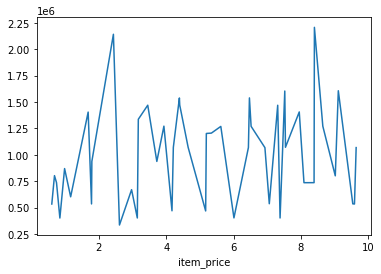

In [32]:
by_date = df.groupby(['item_price']).sale_amount.sum().reset_index()
by_date.plot(x='item_price', y='sale_amount')

<AxesSubplot:xlabel='sale_amount'>

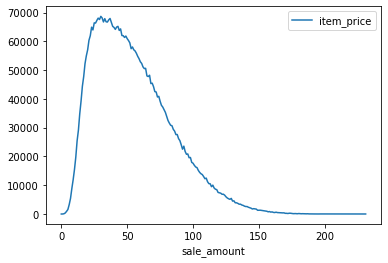

In [42]:
by_date = df.groupby(['sale_amount']).item_price.sum().reset_index()
by_date.plot(y='item_price', x='sale_amount')

### 3. Set the index to be the datetime variable.

In [41]:
df = df.set_index('sale_date').sort_index()

In [34]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [43]:
df['month'] = df.index.month

In [44]:
df['day_of_week'] = df.index.day_name()


In [45]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday
2013-01-01 00:00:00+00:00,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [46]:
df['sales_total'] = df.sale_amount * df.item_price


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

- all the above steps are part of prepare.py

### Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [2]:
df2 = aq.get_open_power_data()

In [3]:
df2.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


### 1. Convert date column to datetime format.


In [5]:
df2.Date = pd.to_datetime(df2.Date)

### 2. Plot the distribution of each of your variables.

<AxesSubplot:xlabel='Date'>

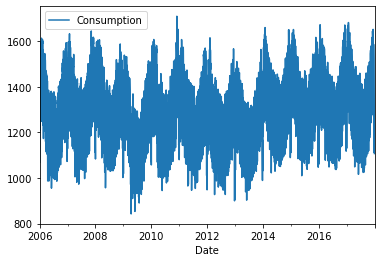

In [8]:
# plotting consumption
by_date = df2.groupby('Date').Consumption.sum().reset_index()
by_date.plot(x='Date', y='Consumption')

<AxesSubplot:xlabel='Date'>

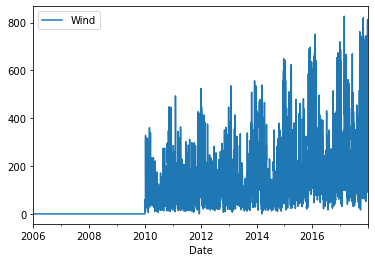

In [9]:
# plotting wind
by_date = df2.groupby('Date').Wind.sum().reset_index()
by_date.plot(x='Date', y='Wind')

<AxesSubplot:xlabel='Date'>

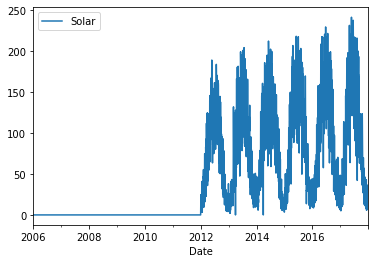

In [10]:
# plotting solar
by_date = df2.groupby('Date').Solar.sum().reset_index()
by_date.plot(x='Date', y='Solar')

In [14]:
df2['Wind_Solar'] = df2['Wind+Solar']

<AxesSubplot:xlabel='Date'>

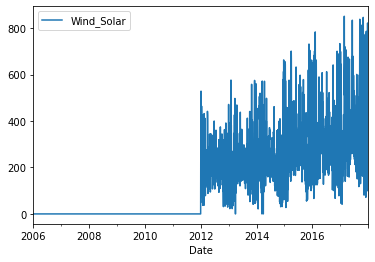

In [15]:
by_date = df2.groupby('Date').Wind_Solar.sum().reset_index()
by_date.plot(x='Date', y='Wind_Solar')

### 3. Set the index to be the datetime variable.

In [16]:
# set and sort the index

df2 = df2.set_index('Date').sort_index()

### 4. Add a month and a year column to your dataframe.

In [17]:
df2['month'] = df2.index.month

In [18]:
df2['year'] = df2.index.year

### 5. Fill any missing values.

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   Wind_Solar   2187 non-null   float64
 5   month        4383 non-null   int64  
 6   year         4383 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 273.9 KB


In [20]:
df2.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
Wind_Solar     2196
month             0
year              0
dtype: int64

### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

all above steps added to prepare script